In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn import metrics
import seaborn as sns
import math 
from sklearn.metrics import classification_report

In [269]:
data = pd.read_csv('datos_limpios.csv') 

In [270]:
data_case = data.copy()

## Eleccion de la clasificacion

In [271]:
data_case['Above Average'] = data_case['Salary'] > 115000 
#data_case['Above Average'] = pd.get_dummies(data_case['Above Average'], drop_first= True)
data_case['Above Average'] = data_case['Above Average'].astype(int)
# Separamos los datos para elegir si estan por debajo o por encima del promedio
data_case


,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Job class,Above Average
0,1.0,1.0,49.0,5.0,90000.0,3,9,0.0,0
1,0.0,2.0,2.0,3.0,65000.0,4,5,0.0,0
2,0.0,1.0,36.0,7.0,60000.0,4,5,0.0,0
3,1.0,1.0,25.0,2.0,55000.0,4,5,0.0,0
4,0.0,2.0,31.0,12.0,120000.0,4,1,0.0,1
...,...,...,...,...,...,...,...,...,...
6342,0.0,3.0,7.0,20.0,200000.0,3,7,0.0,1
6343,1.0,0.0,36.0,3.0,50000.0,0,2,0.0,0
6344,0.0,1.0,9.0,4.0,55000.0,2,4,0.0,0
6345,1.0,2.0,28.0,14.0,140000.0,2,6,0.0,1


c:\Users\xavie\miniconda3\envs\datasc\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


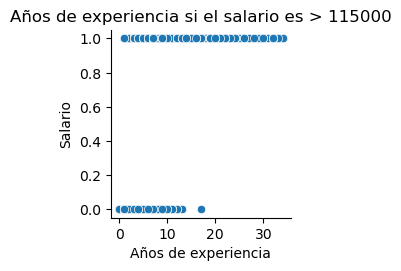

In [272]:
x = data_case['Years of Experience']
y = data_case['Above Average']
sns.pairplot(data_case,x_vars=['Years of Experience'],y_vars=['Above Average'],kind='scatter')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.title('Años de experiencia si el salario es > 115000')
plt.show()

En la siguiente celda se crea la funcion que entrena y da el resultado del dataset

In [273]:
def show_result(X_train, X_test, Y_train, Y_test):
    #Almacenamos el modelo en una variable
    model = LogisticRegression()

    #Entrenamos los datos 
    model.fit(X_train, Y_train)

    #Prediccion
    Y_pred = model.predict(X_test)

    #Coeficientes
    print('beta_0:',model.intercept_)
    print('beta_1:',model.coef_)
    print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))

    # Matriz de confusion
    conf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap = 'Blues_r')
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

    #Caracteristicas de la matriz de confusion
    print (classification_report(Y_test, Y_pred))

## Regrsion logistica unidimensional

Dividimos el dataset

In [274]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)
x_train, x_test = np.array(x_train).reshape(-1, 1), np.array(x_test).reshape(-1, 1)
y_train, y_test = np.array(y_train).reshape(-1, 1), np.array(y_test).reshape(-1, 1)

c:\Users\xavie\miniconda3\envs\datasc\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


beta_0: [-4.31997968]
beta_1: [[0.62614035]]
Coefficient of determination: 0.44


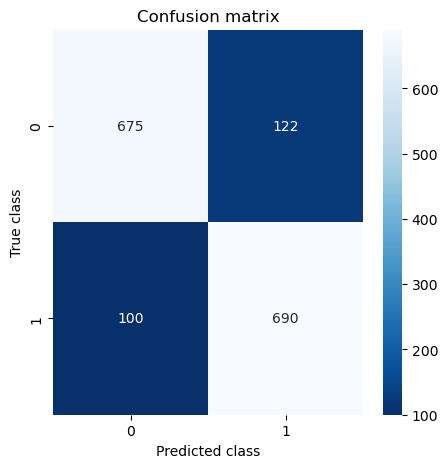

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       797
           1       0.85      0.87      0.86       790

    accuracy                           0.86      1587
   macro avg       0.86      0.86      0.86      1587
weighted avg       0.86      0.86      0.86      1587



In [275]:
show_result(x_train, x_test, y_train, y_test)

Graficamos la funcion sigmoide asociada junto con los datos 

c:\Users\xavie\miniconda3\envs\datasc\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xavie\AppData\Local\Temp\ipykernel_2484\616979756.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/(1+math.exp(-exponent))


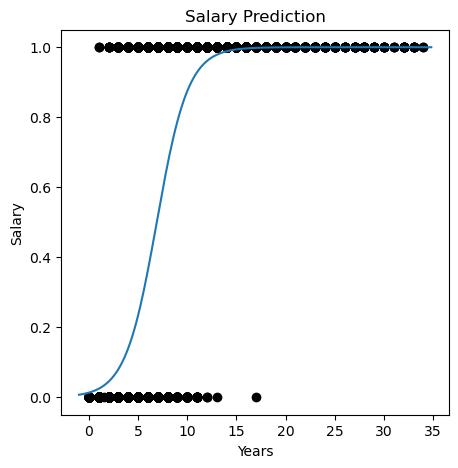

In [276]:
model = LogisticRegression()
model.fit(x_train, y_train)
def funct_exp(x):
    exponent = model.intercept_ + np.dot(model.coef_[0], x)
    return 1/(1+math.exp(-exponent))

x = np.arange(-1, 35., 0.2)
sig = [funct_exp(i) for i in x]


plt.figure(figsize=(5,5))
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.scatter(data_case['Years of Experience'], data_case['Above Average'], c='black')
plt.plot(x,sig)
plt.show()

## Regresion logistica multidimensional 

beta_0: [-4.56246212]
beta_1: [[ 0.33180603  0.28546586 -0.0033866   0.60637894 -0.08499319  0.00291674
  -0.22432197]]
Coefficient of determination: 0.49


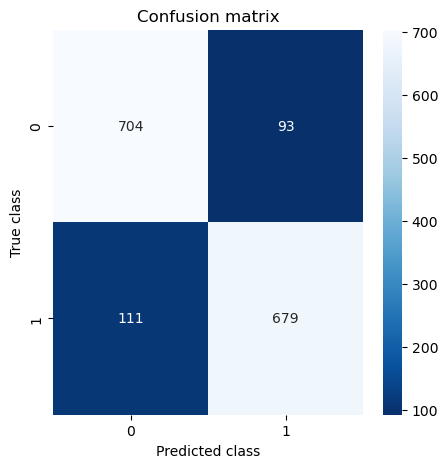

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       797
           1       0.88      0.86      0.87       790

    accuracy                           0.87      1587
   macro avg       0.87      0.87      0.87      1587
weighted avg       0.87      0.87      0.87      1587



In [277]:

x = data_case.drop(['Salary', 'Above Average'], axis=1)
y = data_case['Above Average']
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

show_result(x_train, x_test, y_train, y_test)


# Modificamos el dataset
Haremos que cada clasificacion de las caracteristicas 'Country', 'Race' y 'Job Title' sea una nueva columna, esto para que no haya sesgo al elegir su valor numerico.

In [278]:
data1 = data_case.copy()


In [279]:
data2 = pd.concat([data1, pd.get_dummies(data1['Race'], dtype = int, prefix= 'Race')], axis = 1)
data3 = pd.concat([data2, pd.get_dummies(data2['Job Title'], dtype = int, prefix= 'Job')], axis = 1)
data4 = pd.concat([data3, pd.get_dummies(data3['Country'], dtype = int, prefix= 'Country')], axis = 1)
data4

,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Job class,Above Average,Race_0,...,Job_47.0,Job_48.0,Job_49.0,Job_50.0,Job_51.0,Country_0,Country_1,Country_2,Country_3,Country_4
0,1.0,1.0,49.0,5.0,90000.0,3,9,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0.0,2.0,2.0,3.0,65000.0,4,5,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,1.0,36.0,7.0,60000.0,4,5,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1.0,25.0,2.0,55000.0,4,5,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,2.0,31.0,12.0,120000.0,4,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,0.0,3.0,7.0,20.0,200000.0,3,7,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
6343,1.0,0.0,36.0,3.0,50000.0,0,2,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
6344,0.0,1.0,9.0,4.0,55000.0,2,4,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
6345,1.0,2.0,28.0,14.0,140000.0,2,6,0.0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [280]:
X = data3.drop(['Salary', 'Race', 'Job Title', 'Country', 'Above Average'], axis=1)
Y = data3['Above Average']
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)


c:\Users\xavie\miniconda3\envs\datasc\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


beta_0: [-7.17848661]
beta_1: [[ 0.365459   -0.02241169  0.86370789  0.01417267 -0.34041052 -0.07677708
   0.13297606  0.25483752 -0.2873319   0.02675333  0.28848141  0.02270922
  -0.02991286  0.02113104  1.16719773 -0.88171291  3.47087817  3.73003614
  -1.27546625  0.02341827 -1.69861695 -1.26123088 -0.58867147  1.79503325
  -0.39047606 -0.02867367  1.07716968 -0.05358512 -0.2311058  -1.15732063
  -0.36939565 -0.19645809 -0.20263647 -1.00024625 -0.2076384  -0.53379359
  -0.1807083  -0.07365603 -0.1601906  -0.79965588 -1.25039493  0.5127875
  -0.25650765 -2.0009369  -0.32866519  2.77071829  0.96849067 -0.02727034
   1.2037563   1.34976246 -0.3027988   0.21754346 -0.45454269 -0.80288664
  -0.55098311  1.86321028 -3.40306478 -2.19238044 -2.10434305  1.53050369
   0.8708597   0.52466386 -1.28670456  2.98858525  2.11713399 -1.91657436]]
Coefficient of determination: 0.72


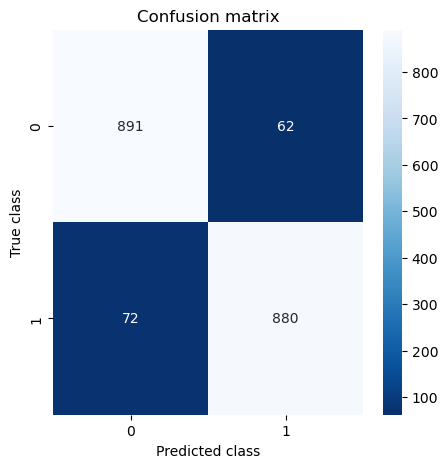

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       953
           1       0.93      0.92      0.93       952

    accuracy                           0.93      1905
   macro avg       0.93      0.93      0.93      1905
weighted avg       0.93      0.93      0.93      1905



In [281]:
show_result(X_train, X_test, Y_train, Y_test)